## 0. Importing all libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import requests

## 1. Function to load dataset

In [9]:
def load_dataset():
    dataset = pd.read_csv('googleplaystore.csv')
    return dataset

In [10]:
dataset = load_dataset()

## 2. Printing summary of the dataset

In [11]:
def print_summarize_dataset(dataset):
    print("Dataset dimension:")
    print(dataset.shape)
    print("First 10 rows of dataset:")
    print(dataset.head(10))
    print("Statistical summary:")
    print(dataset.describe(include='all'))

In [12]:
print_summarize_dataset(dataset)

Dataset dimension:
(10841, 13)
First 10 rows of dataset:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

  Reviews  Size     Installs  Type Price Content Rating  \
0  

## 3. Cleaning the dataset

In [13]:
def clean_dataset(dataset):
    new_dataset = dataset.dropna()
    return new_dataset

In [14]:
dataset = clean_dataset(dataset)

## 4. Printing the histogram

In [15]:
def print_histograms(dataset):
    if dataset.Reviews.dtype != int:
        dataset.Reviews = dataset.Reviews.astype(int)
    if dataset.Installs.dtype != int:
        dataset.Installs = dataset.Installs.str.replace('+','',regex=True).str.replace(',','', regex=True).astype(int)
    if dataset.Price.dtype != int:
        dataset.Price = dataset.Price.str.replace('$','',regex=True).astype(float)
    dataset.hist(bins=50)
    plt.show()

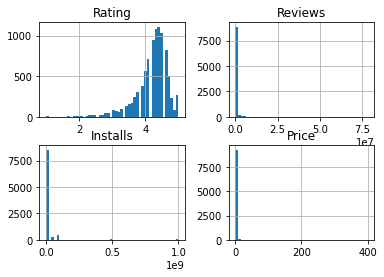

In [16]:
print_histograms(dataset)

## 5. Computation of Correlation Matrix

In [17]:
def compute_correlations_matrix(dataset):
    corr_matrix = dataset.corr()
    return corr_matrix

In [18]:
correlations = compute_correlations_matrix(dataset)
print(correlations['Rating'])

Rating      1.000000
Reviews     0.068133
Installs    0.051337
Price      -0.021919
Name: Rating, dtype: float64


## 6. Print Scatter Matrix

In [19]:
def print_scatter_matrix(dataset):
    pd.plotting.scatter_matrix(dataset,figsize=(10,8))

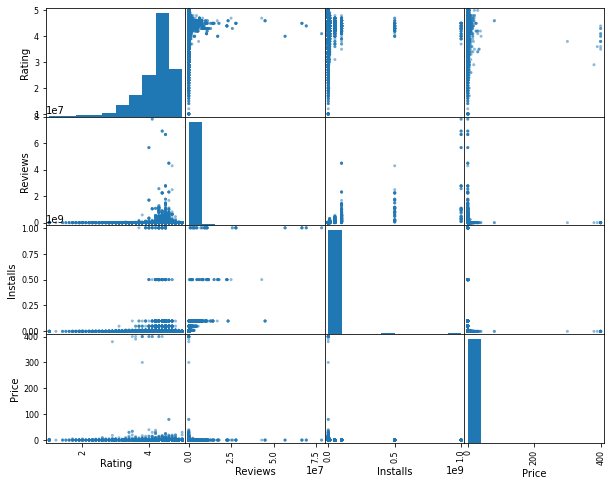

In [20]:
print_scatter_matrix(dataset)

## 7. Q/A

<font size="3">
1) What is the size of the market? numbers of download and $<br>

In [21]:
print(f"Total number of downloads: ~{dataset.Installs.sum()/1e9:.2f}B downloads")
print(f"Total amount of sells: ~${(dataset.Price*dataset.Installs).sum()/1e6:.2f}M")

Total number of downloads: ~167.63B downloads
Total amount of sells: ~$388.45M


<font size="3">
2) Same question but per category? (percentages please)<br>

In [22]:
df = pd.DataFrame()
df['Sales'] = dataset['Installs'] * dataset['Price']
df['Installs'] = dataset['Installs'] 
df['Category'] = dataset['Category'] 
df_cat = pd.DataFrame()
df_cat['Installs'] = df.groupby(by=['Category'])['Installs'].sum()
df_cat['Sales'] = df.groupby(by=['Category'])['Sales'].sum()
print(df_cat)

                        Installs         Sales
Category                                      
ART_AND_DESIGN         124228100  3.184000e+04
AUTO_AND_VEHICLES       53129800  9.950000e+04
BEAUTY                  26916200  0.000000e+00
BOOKS_AND_REFERENCE   1921291655  8.890150e+04
BUSINESS              1001768120  2.045648e+06
COMICS                  56036100  0.000000e+00
COMMUNICATION        32647241530  4.247100e+06
DATING                 264295110  8.758900e+04
EDUCATION              871352000  2.403980e+06
ENTERTAINMENT         2869160000  7.980000e+05
EVENTS                  15949410  0.000000e+00
FAMILY               10257651590  1.859971e+08
FINANCE                876612400  2.572664e+07
FOOD_AND_DRINK         273777750  2.844000e+05
GAME                 35085862717  4.098684e+07
HEALTH_AND_FITNESS    1583056220  1.719270e+06
HOUSE_AND_HOME         168582000  0.000000e+00
LIBRARIES_AND_DEMO      61083000  0.000000e+00
LIFESTYLE              537561120  5.758394e+07
MAPS_AND_NAVI

<font size="3">
3) Depending on each category, what are the ratio of download per app?<br>

In [23]:
df_cat['DownloadsPerApp'] = df.groupby(by=['Category'])['Installs'].sum()/df.groupby(by=['Category'])['Installs'].count()
print("Downloads per app: ") 
print(df_cat['DownloadsPerApp'])

Downloads per app: 
Category
ART_AND_DESIGN         2.036526e+06
AUTO_AND_VEHICLES      7.278055e+05
BEAUTY                 6.408619e+05
BOOKS_AND_REFERENCE    1.079377e+07
BUSINESS               3.306165e+06
COMICS                 9.661397e+05
COMMUNICATION          9.953427e+07
DATING                 1.355360e+06
EDUCATION              5.621626e+06
ENTERTAINMENT          1.925611e+07
EVENTS                 3.544313e+05
FAMILY                 5.874944e+06
FINANCE                2.713970e+06
FOOD_AND_DRINK         2.511722e+06
GAME                   3.198347e+07
HEALTH_AND_FITNESS     5.330156e+06
HOUSE_AND_HOME         2.218184e+06
LIBRARIES_AND_DEMO     9.544219e+05
LIFESTYLE              1.711978e+06
MAPS_AND_NAVIGATION    5.840867e+06
MEDICAL                1.520159e+05
NEWS_AND_MAGAZINES     3.217258e+07
PARENTING              6.223222e+05
PERSONALIZATION        7.453019e+06
PHOTOGRAPHY            3.182411e+07
PRODUCTIVITY           4.038766e+07
SHOPPING               1.364635e+07

<font size="3">
4) Any additional information you will find useful for us to take the right decision.<br>

In [24]:
print("Sales per app:")
df_cat['SalesPerApp'] = df_cat['Sales'] / df.groupby(by=['Category'])['Installs'].count()
print(df_cat['SalesPerApp'])

Sales per app:
Category
ART_AND_DESIGN            521.967213
AUTO_AND_VEHICLES        1363.013699
BEAUTY                      0.000000
BOOKS_AND_REFERENCE       499.446629
BUSINESS                 6751.314851
COMICS                      0.000000
COMMUNICATION           12948.475610
DATING                    449.174359
EDUCATION               15509.548387
ENTERTAINMENT            5355.704698
EVENTS                      0.000000
FAMILY                 106527.541065
FINANCE                 79649.052632
FOOD_AND_DRINK           2609.174312
GAME                    37362.662607
HEALTH_AND_FITNESS       5788.787879
HOUSE_AND_HOME              0.000000
LIBRARIES_AND_DEMO          0.000000
LIFESTYLE              183388.342038
MAPS_AND_NAVIGATION     10006.362903
MEDICAL                 38534.754286
NEWS_AND_MAGAZINES         27.660944
PARENTING                4999.180000
PERSONALIZATION         32932.114744
PHOTOGRAPHY             65997.002524
PRODUCTIVITY            12263.395726
SHOPPING      

## 8. Additional Part (Diagrams for Post)

<font size="3">
1) The most populars paid apps of Family category

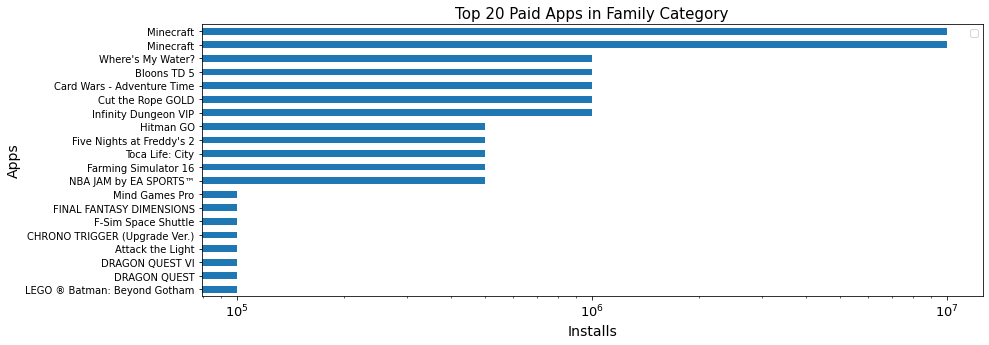

In [25]:
paid_family_df = dataset.groupby(by=['Category','Type']).get_group(('FAMILY','Paid'))
top20_paid_family = paid_family_df.sort_values(by=['Installs'], ascending=False)[:20]

ax = top20_paid_family.plot.barh(x='App', y='Installs', rot=0, figsize=(14,5), logx=True)
plt.xlabel('Installs', fontsize=14)
plt.ylabel('Apps', fontsize=14)
plt.gca().invert_yaxis()
plt.title("Top 20 Paid Apps in Family Category", fontsize=15)
plt.xticks(fontsize=13)
plt.legend('')

<font size="3">
2) The most popular genres according to the number of installations from paid family

Text(0.5, 1.0, 'Top 10 Genres of Paid Apps from Family Category')

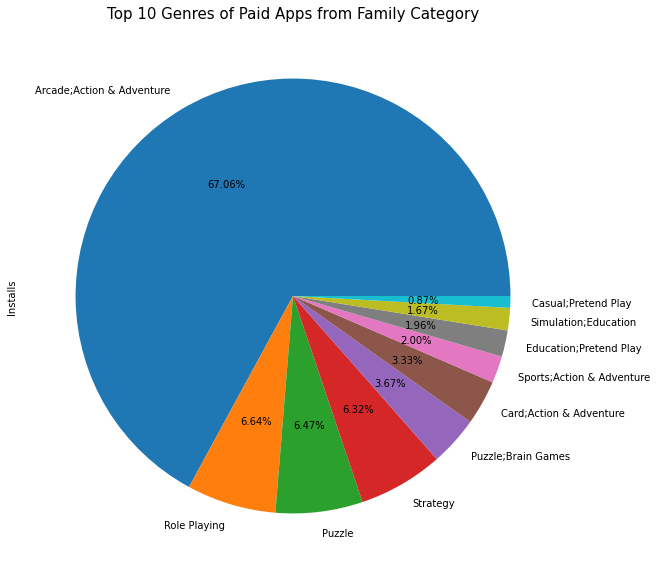

In [26]:
genres = paid_family_df.groupby('Genres')['Installs'].sum().sort_values(ascending=False)[:10]
plot = genres.plot.pie(figsize=(10, 10),autopct='%.2f%%')
plt.title('Top 10 Genres of Paid Apps from Family Category', fontsize=15)

<font size="3">
3) An array with the number of installation per category

In [27]:
df_inst = df.groupby(by=['Category'])['Installs'].sum().sort_values(ascending=False)
arr_inst = df_inst.values
print(df_inst)

Category
GAME                   35085862717
COMMUNICATION          32647241530
PRODUCTIVITY           14176070180
SOCIAL                 14069841475
TOOLS                  11450224500
FAMILY                 10257651590
PHOTOGRAPHY            10088243130
NEWS_AND_MAGAZINES      7496210650
TRAVEL_AND_LOCAL        6868859300
VIDEO_PLAYERS           6221897200
SHOPPING                3247831540
ENTERTAINMENT           2869160000
PERSONALIZATION         2325341930
BOOKS_AND_REFERENCE     1921291655
SPORTS                  1751131465
HEALTH_AND_FITNESS      1583056220
BUSINESS                1001768120
FINANCE                  876612400
EDUCATION                871352000
MAPS_AND_NAVIGATION      724267560
LIFESTYLE                537561120
WEATHER                  426096500
FOOD_AND_DRINK           273777750
DATING                   264295110
HOUSE_AND_HOME           168582000
ART_AND_DESIGN           124228100
LIBRARIES_AND_DEMO        61083000
COMICS                    56036100
MEDICAL    

<font size="3">
4)  A pie chart with the number of installation per category

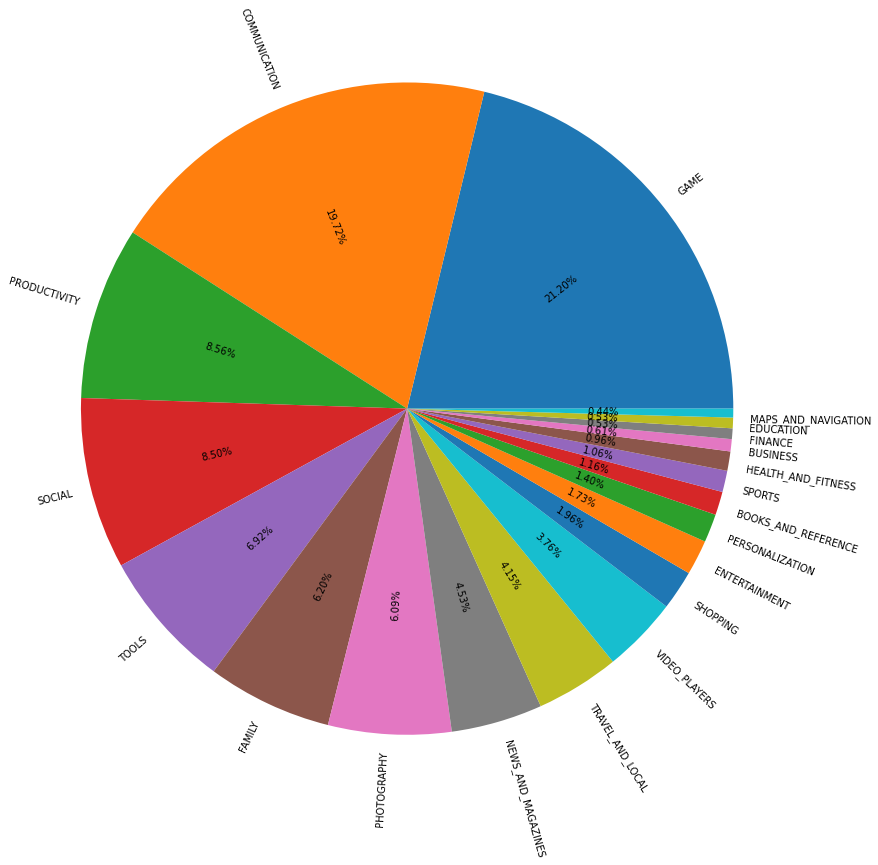

In [28]:
labels = df_inst.index
ax = plt.figure(figsize=(10,10))
patches, labels, pct_texts = plt.pie(arr_inst[:20], autopct='%.2f%%', labels=labels[:20], rotatelabels= 270, radius=1.5, labeldistance=1.05)
for label, pct_text in zip(labels, pct_texts):
    pct_text.set_rotation(label.get_rotation())

<font size="3">
5) A bar chart with the mean price per category

Text(0.5, 1.0, 'Mean Price per Category')

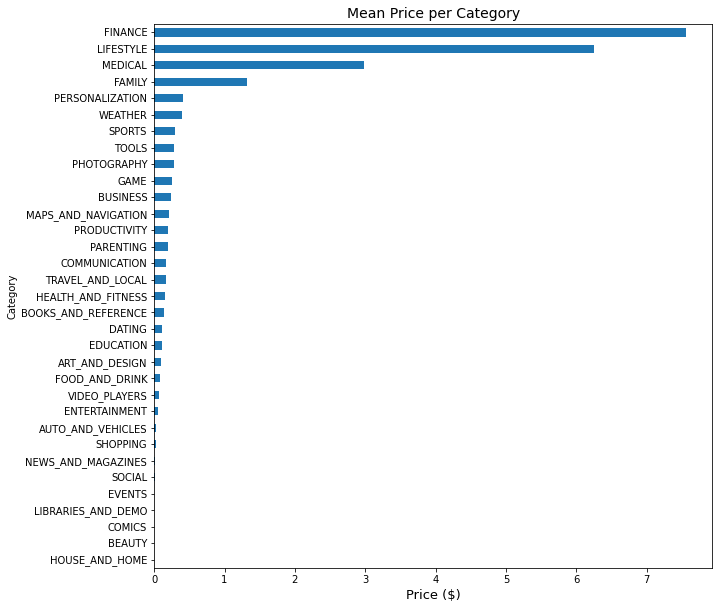

In [29]:
df_meanPrice = dataset.groupby(by=['Category'])['Price'].mean().sort_values(ascending=False)
ax = df_meanPrice.plot.barh(figsize=(10,10))
plt.gca().invert_yaxis()
ax = plt.xlabel('Price ($)', fontsize=13)
plt.title('Mean Price per Category', fontsize=14)

<font size="3">
6) Most expensive apps per category

In [30]:
exp_apps = dataset.sort_values(by=['Price'], ascending=False).groupby(by=['Category'])['App','Price'].first()
print(exp_apps)

                                                                   App   Price
Category                                                                      
ART_AND_DESIGN       X Launcher Pro: PhoneX Theme, OS11 Control Center    1.99
AUTO_AND_VEHICLES                               Ulysse Speedometer Pro    1.99
BEAUTY                                    Best Hairstyles step by step    0.00
BOOKS_AND_REFERENCE                      Officiel du SCRABBLE LAROUSSE    4.60
BUSINESS                                            SkyTest BU/GU Lite   17.99
COMICS                                                   CJ - BR MEMES    0.00
COMMUNICATION                                 K-@ Mail Pro - Email App    4.99
DATING               AMBW Dating App: Asian Men Black Women Interra...    7.99
EDUCATION                       Fuzzy Numbers: Pre-K Number Foundation    5.99
ENTERTAINMENT                                           My Talking Pet    4.99
EVENTS                                              

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
